In [13]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


from sklearn.model_selection import train_test_split

In [14]:
#Import our data
df=pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,...,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,...,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0


In [15]:
#Drop uneeded columns (if applicable)

In [16]:
y=df["Diabetes_binary"]
X=df.drop(columns=["Diabetes_binary"])

In [17]:
df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.373591,0.278599,0.123393,0.267604,0.082156,0.120238,0.206995,-0.197331,-0.038621,...,0.046204,0.020921,0.383091,0.048857,0.193755,0.257696,0.053717,0.291909,-0.137252,-0.214989
HighBP,0.373591,1.000000,0.300694,0.107296,0.230404,0.087315,0.126912,0.206466,-0.148531,-0.031244,...,0.055874,0.003628,0.303713,0.017916,0.151440,0.220855,0.065661,0.343004,-0.114129,-0.173356
HighChol,0.278599,0.300694,1.000000,0.100197,0.101077,0.084734,0.084174,0.169249,-0.092512,-0.034396,...,0.049137,0.011230,0.213397,0.043489,0.121658,0.144309,0.026135,0.257054,-0.053325,-0.091887
CholCheck,0.123393,0.107296,0.100197,1.000000,0.050932,-0.003844,0.022411,0.044713,-0.023287,0.013616,...,0.132277,-0.049765,0.061330,-0.009358,0.038394,0.052412,-0.035492,0.112191,0.012383,0.000079
BMI,0.267604,0.230404,0.101077,0.050932,1.000000,0.013636,0.009458,0.043364,-0.185509,-0.083964,...,0.001826,0.047505,0.273345,0.110860,0.154244,0.242741,-0.027434,-0.055741,-0.093127,-0.131246
Smoker,0.082156,0.087315,0.084734,-0.003844,0.013636,1.000000,0.056541,0.124449,-0.085491,-0.065085,...,-0.015605,0.041577,0.161102,0.082693,0.114741,0.123480,0.092013,0.111569,-0.164250,-0.135845
Stroke,0.120238,0.126912,0.084174,0.022411,0.009458,0.056541,1.000000,0.189416,-0.081872,-0.001631,...,0.017918,0.033041,0.170101,0.062414,0.144957,0.172060,0.002273,0.124008,-0.060725,-0.128845
HeartDiseaseorAttack,0.206995,0.206466,0.169249,0.044713,0.043364,0.124449,0.189416,1.000000,-0.111463,-0.012966,...,0.025910,0.022415,0.262052,0.052739,0.188902,0.206880,0.102683,0.229127,-0.086260,-0.136488
PhysActivity,-0.197331,-0.148531,-0.092512,-0.023287,-0.185509,-0.085491,-0.081872,-0.111463,1.000000,0.114363,...,0.017758,-0.054458,-0.310062,-0.134668,-0.273548,-0.308738,0.063995,-0.135661,0.202974,0.248070
Fruits,-0.038621,-0.031244,-0.034396,0.013616,-0.083964,-0.065085,-0.001631,-0.012966,0.114363,1.000000,...,0.019495,-0.028261,-0.078474,-0.058739,-0.035264,-0.032396,-0.055988,0.067651,0.080960,0.049508


<Axes: >

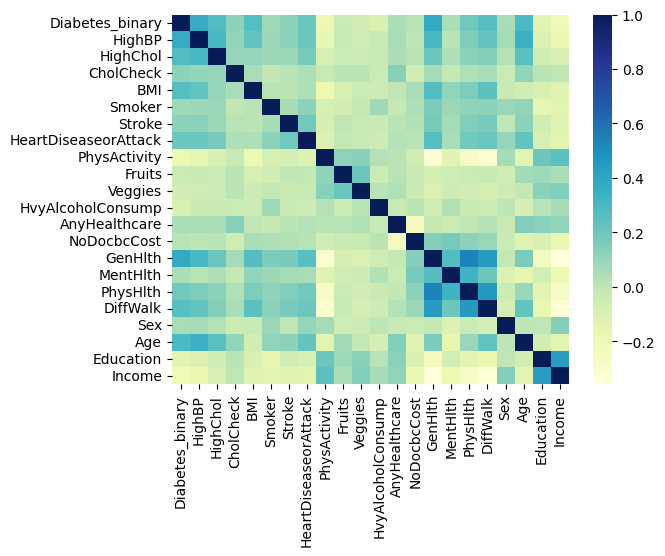

In [18]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
dataplot

In [19]:
# splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

# creating scaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
classifier = LogisticRegression(solver='lbfgs', random_state=1234)
classifier

LogisticRegression(random_state=1234)

In [21]:
# Train the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1234)

In [22]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7423141086749285
Testing Data Score: 0.7420757864632984


In [23]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1839,1.0,0.0
45005,0.0,1.0
14530,0.0,0.0
66032,0.0,1.0
54722,1.0,1.0
...,...,...
41810,1.0,1.0
44851,1.0,1.0
63781,1.0,1.0
2832,0.0,0.0


In [24]:
accuracy_score(y_test, predictions)

0.7420757864632984

In [25]:
df.describe().iloc[2]

Diabetes_binary         0.500004
HighBP                  0.497663
HighChol                0.500004
CholCheck               0.152341
BMI                     7.095737
Smoker                  0.496409
Stroke                  0.235375
HeartDiseaseorAttack    0.343462
PhysActivity            0.450334
Fruits                  0.488656
Veggies                 0.391822
HvyAlcoholConsump       0.216098
AnyHealthcare           0.177955
NoDocbcCost             0.249194
GenHlth                 1.073759
MentHlth                8.323138
PhysHlth                9.593837
DiffWalk                0.421605
Sex                     0.499961
Age                     3.019624
Education               0.981610
Income                  2.422641
Name: std, dtype: float64

In [52]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation="relu", input_dim=21))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="sigmoid", input_dim=21))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=21))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", input_dim=21))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                1100      
                                                                 
 dense_25 (Dense)            (None, 30)                1530      
                                                                 
 dense_26 (Dense)            (None, 10)                310       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2951 (11.53 KB)
Trainable params: 2951 (11.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
1574/1574 [==============================] - 4s 2ms/step - loss: 0.5273 - accuracy: 0.7384
Epoch 2/20
1574/1574 [==============================] - 3s 2ms/step - loss: 0.5137 - accuracy: 0.7457
Epoch 3/20
1574/1574 [==============================] - 5s 3ms/step - loss: 0.5117 - accuracy: 0.7476
Epoch 4/20
1574/1574 [==============================] - 3s 2ms/step - loss: 0.5105 - accuracy: 0.7488
Epoch 5/20
1574/1574 [==============================] - 3s 2ms/step - loss: 0.5093 - accuracy: 0.7494
Epoch 6/20
1574/1574 [==============================] - 4s 2ms/step - loss: 0.5089 - accuracy: 0.7496
Epoch 7/20
1574/1574 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.7496
Epoch 8/20
1574/1574 [==============================] - 3s 2ms/step - loss: 0.5075 - accuracy: 0.7507
Epoch 9/20
1574/1574 [==============================] - 3s 2ms/step - loss: 0.5071 - accuracy: 0.7513
Epoch 10/20
1574/1574 [==============================] - 4s 3ms/step - loss: 0.506

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

525/525 - 1s - loss: 0.5526 - accuracy: 0.7297 - 858ms/epoch - 2ms/step
Loss: 0.5525583624839783, Accuracy: 0.7296830415725708


In [30]:
# Export our model to HDF5 file
nn.save("diabetes_nn_model.h5", save_format = 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
